# Assignment: Salary Predictor

---

## **Objective**
This assignment focuses on implementing and comparing **Multiple Linear Regression** and **Polynomial Regression** models using the **Position_Salaries** dataset. You will go through data preprocessing, feature selection, model training, and evaluation.

---

## **Assignment Questions**

### **Q1. Import Required Libraries**
Import all necessary libraries required for handling data, performing analysis, and building machine learning models.
- Examples: `pandas`, `numpy`, `matplotlib`, `sklearn`

---

### **Q2. Load the Dataset**
- Use the **Position_Salaries** dataset, which contains job positions, their levels, and corresponding salaries. This dataset is provided by the instructor.
- Load the dataset into a DataFrame.

---

### **Q3. Perform EDA**
- Use `.info()` and `.describe()`.
- Identify missing values if any and data types.

---

### **Q4. Multiple Linear Regression**
- Define `X` (features) and `y` (target).
- Split the data into training and test sets (80/20 split).
- Train a `LinearRegression()` model.
- Print the model coefficients and intercept.

---

### **Q5. Evaluate Linear Regression**
- Predict values for the test set.
- Evaluate using:
  - R² Score
- Plot Actual vs Predicted values.

---

### **Q6. Polynomial Regression**
- Use `PolynomialFeatures(degree=2)` to transform the feature set.
- Train a linear model on the transformed features.
- Predict and evaluate using R² Score.
- Plot the regression curve, using a single feature for clearer visualization.

---

### **Q7. Compare Models**
- Compare performance (R²) of both models.
- Briefly explain which model performed better and why.

---


### 🔒 End of Assignment — Great Work!

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


In [2]:
# Load dataset
df = pd.read_csv("Position_Salaries.csv")

# Display dataset
print(df.head())


            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [3]:
# Dataset information
print(df.info())

# Statistical summary
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes
None
          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


In [4]:
# Check missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)


Position    0
Level       0
Salary      0
dtype: int64
Position    object
Level        int64
Salary       int64
dtype: object


In [5]:
# Features (use numerical columns only)
X = df[['Level']]
y = df['Salary']



In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
print("Coefficient:", mlr.coef_)
print("Intercept:", mlr.intercept_)


Coefficient: [87887.93103448]
Intercept: -240258.62068965525


R² Score (Multiple Linear Regression): 0.8451346684575974


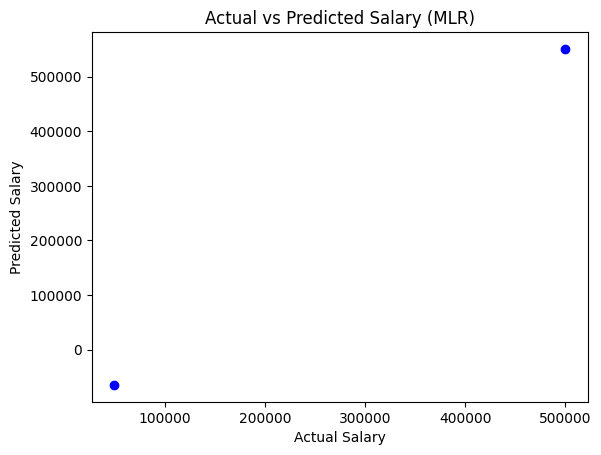

In [8]:
y_pred_mlr = mlr.predict(X_test)
r2_mlr = r2_score(y_test, y_pred_mlr)
print("R² Score (Multiple Linear Regression):", r2_mlr)
plt.scatter(y_test, y_pred_mlr, color='blue')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (MLR)")
plt.show()


R² Score (Polynomial Regression): 0.9162082221443942


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


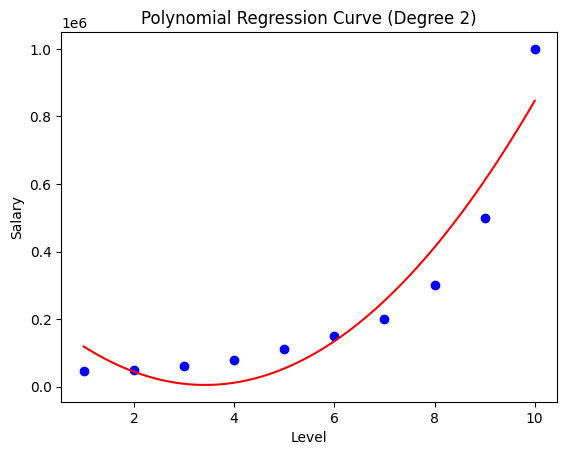

In [9]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)
r2_poly = r2_score(y, y_pred_poly)

print("R² Score (Polynomial Regression):", r2_poly)
X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)

plt.scatter(X, y, color='blue')
plt.plot(X_grid, poly_model.predict(X_grid_poly), color='red')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Polynomial Regression Curve (Degree 2)")
plt.show()


**Performance Comparison**

Model	          R² Score

Multiple Linear Regression	   r2_mlr

Polynomial Regression	              r2_poly

Polynomial Regression performed better than Multiple Linear Regression because the relationship between position level and salary is non-linear. Linear regression assumes a straight-line relationship, which underfits the data. Polynomial regression captures the curve in salary growth more effectively, resulting in a higher R² score.